# Imports

In [88]:
import os
import glob
import json
import ast
import re

from typing import Dict

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Experiments

## Experiments simple baseline

In [14]:
dir = "/home/tvangraft/tudelft/thesis/metaengineering/data/results/experiment_simple_baseline"
paths = glob.glob(dir + "/*.csv")

In [ ]:
# {
#     'regressor__regressor': [GammaRegressor()],
#     'regressor__regressor__alpha': [0, 1, 10],
#     'transformer': [MinMaxScaler()],
# }, {
#     'regressor__regressor': [DecisionTreeRegressor()],
#     'regressor__regressor__criterion': ['squared_error', 'friedman_mse'],
#     'regressor__regressor__max_depth': [None, 5, 10, 20, 15]
# }, {
#     'regressor__regressor': [SVR()],
#     'regressor__regressor__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
# }, {
#     'regressor__regressor': [ElasticNet()],
#     'regressor__regressor__l1_ratio': [0, 0.25, 0.5, 0.75, 1],
# }

In [37]:
def rename(name: str):
    name = name.removeprefix('param_regressor__')
    name = name.removesuffix('_test_score')
    return name

In [72]:
metabolites_names = [path.rsplit('/', 1)[1].removesuffix('.csv').removeprefix('Strategy.METABOLITE_CENTRIC_') for path in paths]
df = pd.concat([
    pd.read_csv(path).assign(metabolite_id=metabolite_name) 
    for path, metabolite_name in zip(paths, metabolites_names)
])
df.columns = df.columns.map(lambda name: rename(name))
df['regressor'] = df['regressor'].replace(to_replace=r'^DecisionTreeRegressor.*', value="DecisionTreeRegressor()", regex=True)
df['mean'] = -1 * df['mean']
df['std'] = -1 * df['std']
df

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,regressor,regressor__alpha,param_transformer,regressor__criterion,regressor__max_depth,...,split44,split45,split46,split47,split48,split49,mean,std,rank,metabolite_id
0,0,0.011982,0.002254,0.000000,0.000000,GammaRegressor(),0.0,MinMaxScaler(),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,oaa
1,1,0.014943,0.003624,0.000000,0.000000,GammaRegressor(),1.0,MinMaxScaler(),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,oaa
2,2,0.016312,0.002515,0.000000,0.000000,GammaRegressor(),10.0,MinMaxScaler(),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,oaa
3,3,0.036892,0.009424,0.008507,0.003811,DecisionTreeRegressor(),NaN,NaN,squared_error,NaN,...,-1.611257e-15,-2.092773e-15,-1.170287e-15,-8.688614e-16,-1.596317e-15,-7.817338e-16,1.198627e-15,-3.167112e-16,4,oaa
4,4,0.025894,0.008019,0.008388,0.004431,DecisionTreeRegressor(),NaN,NaN,squared_error,5.0,...,-6.539633e-02,-6.791161e-02,-6.532048e-02,-6.670235e-02,-6.361563e-02,-6.643665e-02,6.599338e-02,-1.549914e-03,13,oaa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,17,8.631664,0.778944,0.004668,0.001026,ElasticNet(),NaN,NaN,NaN,NaN,...,-3.596060e-01,-3.583641e-01,-3.559620e-01,-3.737959e-01,-3.496497e-01,-3.517101e-01,3.579135e-01,-6.923356e-03,14,accoa
18,18,0.028887,0.006906,0.008263,0.002747,ElasticNet(),NaN,NaN,NaN,NaN,...,-3.828493e-01,-3.816840e-01,-3.790629e-01,-3.979135e-01,-3.724035e-01,-3.746036e-01,3.811511e-01,-7.266398e-03,15,accoa
19,19,0.029481,0.005639,0.008188,0.002243,ElasticNet(),NaN,NaN,NaN,NaN,...,-3.828493e-01,-3.816840e-01,-3.790629e-01,-3.979135e-01,-3.724035e-01,-3.746036e-01,3.811511e-01,-7.266398e-03,15,accoa
20,20,0.029464,0.004176,0.008000,0.001555,ElasticNet(),NaN,NaN,NaN,NaN,...,-3.828493e-01,-3.816840e-01,-3.790629e-01,-3.979135e-01,-3.724035e-01,-3.746036e-01,3.811511e-01,-7.266398e-03,15,accoa


In [53]:
df['regressor'].replace(to_replace=r'^DecisionTreeRegressor.*', value="DecisionTreeRegressor()", regex=True).unique()

array(['GammaRegressor()', 'DecisionTreeRegressor()', 'SVR()',
       'ElasticNet()'], dtype=object)

In [55]:
df['params'].unique()

array(["{'regressor__regressor': GammaRegressor(), 'regressor__regressor__alpha': 0, 'transformer': MinMaxScaler()}",
       "{'regressor__regressor': GammaRegressor(), 'regressor__regressor__alpha': 1, 'transformer': MinMaxScaler()}",
       "{'regressor__regressor': GammaRegressor(), 'regressor__regressor__alpha': 10, 'transformer': MinMaxScaler()}",
       "{'regressor__regressor': DecisionTreeRegressor(criterion='friedman_mse', max_depth=20), 'regressor__regressor__criterion': 'squared_error', 'regressor__regressor__max_depth': None}",
       "{'regressor__regressor': DecisionTreeRegressor(criterion='friedman_mse', max_depth=20), 'regressor__regressor__criterion': 'squared_error', 'regressor__regressor__max_depth': 5}",
       "{'regressor__regressor': DecisionTreeRegressor(criterion='friedman_mse', max_depth=20), 'regressor__regressor__criterion': 'squared_error', 'regressor__regressor__max_depth': 10}",
       "{'regressor__regressor': DecisionTreeRegressor(criterion='friedman_ms

In [107]:
def fmt(param: str):
    param = param.replace('{', '').replace('}', '').replace('regressor__regressor__', '').replace("\'", '')
    param = param.split(',')[1:]
    param = [param.strip() for param in param if "=" not in param]
    return '\n'.join(param)

df['params_fmt'] = df['params'].map(lambda param: fmt(param))

In [108]:
df['params_fmt'].unique()

array(['alpha: 0\ntransformer: MinMaxScaler()',
       'alpha: 1\ntransformer: MinMaxScaler()',
       'alpha: 10\ntransformer: MinMaxScaler()',
       'criterion: squared_error\nmax_depth: None',
       'criterion: squared_error\nmax_depth: 5',
       'criterion: squared_error\nmax_depth: 10',
       'criterion: squared_error\nmax_depth: 20',
       'criterion: squared_error\nmax_depth: 15',
       'criterion: friedman_mse\nmax_depth: None',
       'criterion: friedman_mse\nmax_depth: 5',
       'criterion: friedman_mse\nmax_depth: 10',
       'criterion: friedman_mse\nmax_depth: 20',
       'criterion: friedman_mse\nmax_depth: 15', 'kernel: linear',
       'kernel: poly', 'kernel: rbf', 'kernel: sigmoid', 'l1_ratio: 0',
       'l1_ratio: 0.25', 'l1_ratio: 0.5', 'l1_ratio: 0.75', 'l1_ratio: 1'],
      dtype=object)

/home/tvangraft/tudelft/thesis/.env/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/tvangraft/tudelft/thesis/.env/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


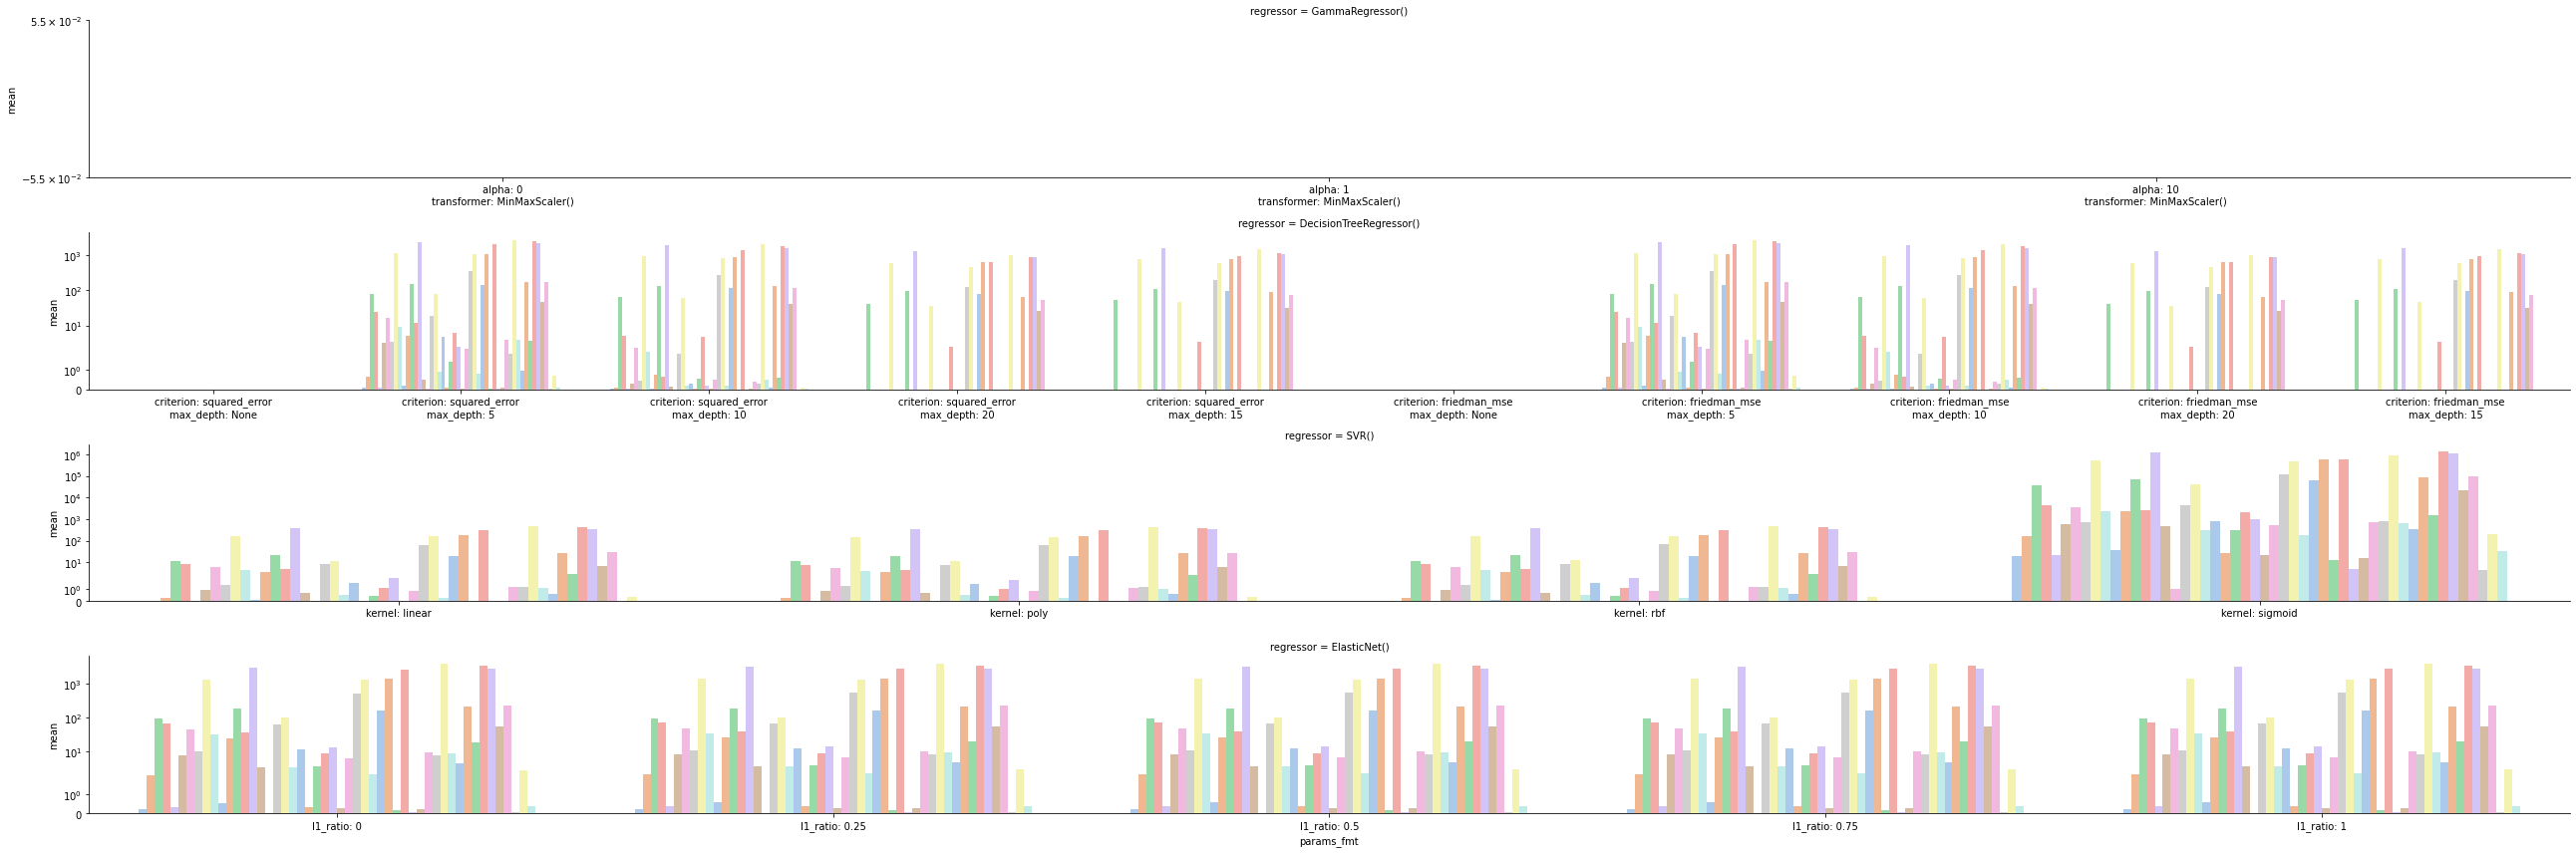

In [112]:
g = sns.FacetGrid(
    data=df,
    row='regressor',
    height=3,
    aspect=12,
    sharey=False,
    sharex=False
)
g.set(yscale='symlog')
g.map(sns.barplot, 'params_fmt', 'mean', 'metabolite_id', palette='pastel')

In [113]:
df.columns

Index(['Unnamed: 0', 'mean_fit_time', 'std_fit_time', 'mean_score_time',
       'std_score_time', 'regressor', 'regressor__alpha', 'param_transformer',
       'regressor__criterion', 'regressor__max_depth', 'regressor__kernel',
       'regressor__l1_ratio', 'params', 'split0', 'split1', 'split2', 'split3',
       'split4', 'split5', 'split6', 'split7', 'split8', 'split9', 'split10',
       'split11', 'split12', 'split13', 'split14', 'split15', 'split16',
       'split17', 'split18', 'split19', 'split20', 'split21', 'split22',
       'split23', 'split24', 'split25', 'split26', 'split27', 'split28',
       'split29', 'split30', 'split31', 'split32', 'split33', 'split34',
       'split35', 'split36', 'split37', 'split38', 'split39', 'split40',
       'split41', 'split42', 'split43', 'split44', 'split45', 'split46',
       'split47', 'split48', 'split49', 'mean', 'std', 'rank', 'metabolite_id',
       'params_fmt'],
      dtype='object')

In [118]:
best_models = df[df['rank'] == 1]
best_models['params_fmt']

11      criterion: friedman_mse\nmax_depth: 20
12      criterion: friedman_mse\nmax_depth: 15
8     criterion: friedman_mse\nmax_depth: None
11      criterion: friedman_mse\nmax_depth: 20
8     criterion: friedman_mse\nmax_depth: None
8     criterion: friedman_mse\nmax_depth: None
8     criterion: friedman_mse\nmax_depth: None
11      criterion: friedman_mse\nmax_depth: 20
8     criterion: friedman_mse\nmax_depth: None
11      criterion: friedman_mse\nmax_depth: 20
11      criterion: friedman_mse\nmax_depth: 20
12      criterion: friedman_mse\nmax_depth: 15
8     criterion: friedman_mse\nmax_depth: None
11      criterion: friedman_mse\nmax_depth: 20
8     criterion: friedman_mse\nmax_depth: None
8     criterion: friedman_mse\nmax_depth: None
8     criterion: friedman_mse\nmax_depth: None
11      criterion: friedman_mse\nmax_depth: 20
8     criterion: friedman_mse\nmax_depth: None
8     criterion: friedman_mse\nmax_depth: None
12      criterion: friedman_mse\nmax_depth: 15
12      crite